In [1]:
#MASTER_NOTEBOOK_CLASSIFICATION

# Classification Project!

Why are our customers churning?
Some questions I have include:
*	Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers))
*	Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.?
*	Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)?
*	If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?

## Deliverables:
1.	I will also need a report (ipynb) answering the question, "Why are our customers churning?" I want to see the analysis you did to answer my questions and lead to your findings. Please clearly call out the questions and answers you are analyzing. E.g. If you find that month-to-month customers churn more, I won't be surprised, but I am not getting rid of that plan. The fact that they churn is not because they can, it's because they can and they are motivated to do so. I want some insight into why they are motivated to do so. I realize you will not be able to do a full causal experiment, but I hope to see some solid evidence of your conclusions.
2.	I will need you to deliver to me a csv with the customer_id, probability of churn, and the prediction of churn (1=churn, 0=not_churn). I would also like a single goolgle slide that illustrates how your model works, including the features being used, so that I can deliver this to the SLT when they come with questions about how these values were derived. Please make sure you include how likely your model is to give a high probability of churn when churn doesn't occur, to give a low probability of churn when churn occurs, and to accurately predict churn.
3.	Finally, our development team will need a .py file that will take in a new dataset, (in the exact same form of the one you acquired from telco_churn.customers) and perform all the transformations necessary to run the model you have developed on this new dataset to provide probabilities and predictions.


# Acquisition
Use the mysql connector to query telco_churn.customers. Assign the output of that query to the dataframe df. You want to include all the fields.

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

In [2]:
path = './'
df = pd.read_csv(path + "telco_churn.csv")

Write a function, peekatdata(dataframe), that takes a dataframe as input and computes and returns the following:
    *	creates dataframe object head_df (df of the first 5 rows) and prints contents to screen
    *	creates dataframe object tail_df (df of the last 5 rows) and prints contents to screen
    *	creates tuple object shape_tuple (tuple of (nrows, ncols)) and prints tuple to screen
    *	creates dataframe object describe_df (summary statistics of all numeric variables) and prints contents to screen.
    *	prints to screen the information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.




In [3]:
def peekatdata(df):
    print("\nRows & Columns:\n")
    print(df.shape)
    print("\nColumn Info:\n")
    print(df.info())
    print("\nFirst 5 rows:\n")
    print(df.head())
    print("\nLast 5 rows:\n")
    print(df.tail())
    print("\nMissing Values:\n")
    missing_vals = df.columns[df.isnull().any()]
    print(df.isnull().sum())
    print("\nSummary Stats:\n")
    print(df.describe())

In [4]:
peekatdata(df)


Rows & Columns:

(7043, 27)

Column Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
customer_id                   7043 non-null object
gender                        7043 non-null object
senior_citizen                7043 non-null int64
partner                       7043 non-null object
dependents                    7043 non-null object
tenure                        7043 non-null int64
phone_service                 7043 non-null object
multiple_lines                7043 non-null object
internet_service_type_id      7043 non-null int64
online_security               7043 non-null object
online_backup                 7043 non-null object
device_protection             7043 non-null object
tech_support                  7043 non-null object
streaming_tv                  7043 non-null object
streaming_movies              7043 non-null object
contract_type_id              7043 non-null int64
paperless_billing             7043 no

# Data Prep
# Question 1
Write a function, df_value_counts(dataframe), that takes a dataframe as input and computes and returns the values by frequency for each variable. Use the rule of thumb for your logic on whether or not to use the bins argument. The function will use a for loop and an in statement.
for col in df.columns: n = df[col].unique().shape[0] col_bins = min(n,10) print('%s:' % col) if df[col].dtype in ['int64','float64'] and n > 10: print(df[col].value_counts(bins=col_bins, sort=False)) else: print(df[col].value_counts()) print('\n')

In [5]:
def df_value_counts(df):
    for col in df.columns: 
        n = df[col].unique().shape[0] 
        col_bins = min(n,10) 
        if df[col].dtype in ['int64','float64'] and n > 10:
            print('%s:' % col)
            print(df[col].value_counts(bins=col_bins, sort=False)) 
        else: 
            print(df[col].value_counts()) 
        print('\n')

In [6]:
df_value_counts(df)

2725-TTRIQ    1
8992-JQYUN    1
3791-LGQCY    1
5846-NEQVZ    1
9094-AZPHK    1
7779-LGOVN    1
8734-DKSTZ    1
2234-EOFPT    1
6469-MRVET    1
9101-BWFSS    1
2603-HVKCG    1
2789-HQBOU    1
3904-UKFRE    1
9979-RGMZT    1
8468-FZTOE    1
6838-YAUVY    1
3892-NXAZG    1
4049-ZPALD    1
6440-DKQGE    1
4807-IZYOZ    1
8905-IAZPF    1
9169-BSVIN    1
0841-NULXI    1
4940-KHCWD    1
9046-JBFWA    1
2209-XADXF    1
2087-QAREY    1
2137-DQMEV    1
8644-XLFBW    1
5522-JBWMO    1
             ..
5628-FCGYG    1
2359-KLTEK    1
0774-RMNUW    1
6221-AVQYL    1
0229-LFJAF    1
1031-IIDEO    1
5025-GOOKI    1
6047-YHPVI    1
7272-QDCKA    1
7029-RPUAV    1
8792-AOROI    1
6990-YNRIO    1
6368-NWMCE    1
5339-PXDVH    1
8267-KFGYD    1
0193-ESZXP    1
2580-ATZSQ    1
0749-IRGQE    1
6719-FGEDO    1
2203-GHNWN    1
4115-BNPJY    1
1156-ZFYDO    1
8259-NFJTV    1
4484-GLZOU    1
3951-NJCVI    1
6876-ADESB    1
8383-SGHJU    1
7402-PWYJJ    1
8851-RAGOV    1
1336-EZFZY    1
Name: customer_id, Lengt

# Question 2
Missing Values:
    *	Write a function, that returns a dataframe of the column name and the number of missing values and the percentage of missing values (missing records/total records) for each of the columns that have > 0 missing values.
df.isnull().sum()
    *	Document your takeaways. For each variable:
    *	should you remove the observations with a missing value for that variable?
    *	should you remove the variable altogether?
    *	is missing equivalent to 0 (or some other constant value) in the specific case of this variable?
    *	should you replace the missing values with a value it is most likely to represent (e.g. Are the missing values a result of data integrity issues and should be replaced by the most likely value?)
    *	Handle the missing values in the way you recommended above.

In [7]:
def percent_missing(df):
    missing_table = df.isnull().sum()/df.shape[0]*100
    return missing_table

In [8]:
percent_missing(df)

customer_id                   0.0
gender                        0.0
senior_citizen                0.0
partner                       0.0
dependents                    0.0
tenure                        0.0
phone_service                 0.0
multiple_lines                0.0
internet_service_type_id      0.0
online_security               0.0
online_backup                 0.0
device_protection             0.0
tech_support                  0.0
streaming_tv                  0.0
streaming_movies              0.0
contract_type_id              0.0
paperless_billing             0.0
payment_type_id               0.0
monthly_charges               0.0
total_charges                 0.0
churn                         0.0
contract_type_id.1            0.0
contract_type                 0.0
internet_service_type_id.1    0.0
internet_service_type         0.0
payment_type_id.1             0.0
payment_type                  0.0
dtype: float64

In [9]:
df['total_charges'] = df['total_charges'].convert_objects(convert_numeric=True)
df.total_charges.dropna(0, inplace=True)

df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.40,No,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,No,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,No,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.10,Yes,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.50,Yes,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


### Total charges was the only variable that had empty strings for 11 values. Those rows were dropped. Every other variable does not have issues with missing data.

# Question 3
Transform churn such that "yes" = 1 and "no" = 0

In [10]:
def make_binary(df):
    df['churn'] == 'Yes'
    (df['churn'] == 'Yes').astype(int)
    df['churn'] = (df['churn'] == 'Yes').astype(int)
    return(df.head())

In [11]:
make_binary(df)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,2,59.9,542.40,0,1,Month-to-month,1,DSL,2,Mailed check
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,4,69.4,571.45,0,1,Month-to-month,1,DSL,4,Credit card (automatic)
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,1,48.2,340.35,0,1,Month-to-month,1,DSL,1,Electronic check
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,1,25.1,25.10,1,1,Month-to-month,1,DSL,1,Electronic check
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,3,30.5,30.50,1,1,Month-to-month,1,DSL,3,Bank transfer (automatic)


# Question 4
Compute a new feature, tenure_year, that is a result of translating tenure from months to years.

In [12]:
df = df.assign(tenure_year=df.tenure/12).round(2)

In [13]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type,tenure_year
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,59.9,542.40,0,1,Month-to-month,1,DSL,2,Mailed check,0.75
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,No,...,69.4,571.45,0,1,Month-to-month,1,DSL,4,Credit card (automatic),0.75
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,Yes,...,48.2,340.35,0,1,Month-to-month,1,DSL,1,Electronic check,0.58
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,No,...,25.1,25.10,1,1,Month-to-month,1,DSL,1,Electronic check,0.08
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,Yes,...,30.5,30.50,1,1,Month-to-month,1,DSL,3,Bank transfer (automatic),0.08


# Question 5
Figure out a way to capture the information contained in phone_service and multiple_lines into a single variable of dtype int. Write a function that will transform the data and place in a new column named phone_id.

### Phone_service and multiple_lines columns are strings with 'Yes', 'No' or 'No phone service' values. Turn columns into 0 or 1 values. Then sum the two columns to make a new column, phone_id. 

In [14]:
df[['phone_service','multiple_lines']].head()

,phone_service,multiple_lines
0,Yes,Yes
1,Yes,No
2,Yes,No
3,No,No phone service
4,No,No phone service


In [15]:
df = df.replace({'phone_service': {'Yes': 1, 'No': 0}})

In [16]:
df[['phone_service']].head()

,phone_service
0,1
1,1
2,1
3,0
4,0


In [17]:
df = df.replace({'multiple_lines': {'Yes': 1, 'No': 0, 'No phone service': 0}})

In [18]:
df[['phone_service','multiple_lines']].head(10)

,phone_service,multiple_lines
0,1,1
1,1,0
2,1,0
3,0,0
4,0,0
5,1,0
6,0,0
7,1,0
8,1,1
9,1,1


In [19]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type,tenure_year
0,0003-MKNFE,Male,0,No,No,9,1,1,1,No,...,59.9,542.40,0,1,Month-to-month,1,DSL,2,Mailed check,0.75
1,0013-MHZWF,Female,0,No,Yes,9,1,0,1,No,...,69.4,571.45,0,1,Month-to-month,1,DSL,4,Credit card (automatic),0.75
2,0015-UOCOJ,Female,1,No,No,7,1,0,1,Yes,...,48.2,340.35,0,1,Month-to-month,1,DSL,1,Electronic check,0.58
3,0023-HGHWL,Male,1,No,No,1,0,0,1,No,...,25.1,25.10,1,1,Month-to-month,1,DSL,1,Electronic check,0.08
4,0032-PGELS,Female,0,Yes,Yes,1,0,0,1,Yes,...,30.5,30.50,1,1,Month-to-month,1,DSL,3,Bank transfer (automatic),0.08


In [20]:
df['phone_id'] = df['phone_service'].astype(int) + df['multiple_lines'].astype(int)

In [21]:
df['phone_id'].value_counts()

1    3390
2    2971
0     682
Name: phone_id, dtype: int64

In [22]:
df[['phone_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
phone_id    7043 non-null int64
dtypes: int64(1)
memory usage: 55.1 KB


## New column, phone_id, created! 
## This column will require a key to understand it: 0 = No phone, 1 = 1 phone line, 2 = multiple phone lines.

# Question 6
Figure out a way to capture the information contained in dependents and partner into a single variable of dtype int. Transform the data and place in a new column household_type_id in df_sql. Be sure you have documented your function and logic well.

In [23]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'internet_service_type_id.1', 'internet_service_type',
       'payment_type_id.1', 'payment_type', 'tenure_year', 'phone_id'],
      dtype='object')

In [24]:
df[['partner','dependents']].head()

,partner,dependents
0,No,No
1,No,Yes
2,No,No
3,No,No
4,Yes,Yes


### Partner and dependents columns are strings with 'Yes' or 'No' values. Turn columns into numerical values. 
### 'Yes partner' = 1
### 'No partner' = 0
### 'No dependents' = 0
### 'Yes dependents' = 2

In [25]:
df = df.replace({'partner': {'Yes': 1, 'No': 0}})

In [26]:
df = df.replace({'dependents': {'Yes': 2, 'No': 0}})

In [27]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type,tenure_year,phone_id
0,0003-MKNFE,Male,0,0,0,9,1,1,1,No,...,542.40,0,1,Month-to-month,1,DSL,2,Mailed check,0.75,2
1,0013-MHZWF,Female,0,0,2,9,1,0,1,No,...,571.45,0,1,Month-to-month,1,DSL,4,Credit card (automatic),0.75,1
2,0015-UOCOJ,Female,1,0,0,7,1,0,1,Yes,...,340.35,0,1,Month-to-month,1,DSL,1,Electronic check,0.58,1
3,0023-HGHWL,Male,1,0,0,1,0,0,1,No,...,25.10,1,1,Month-to-month,1,DSL,1,Electronic check,0.08,0
4,0032-PGELS,Female,0,1,2,1,0,0,1,Yes,...,30.50,1,1,Month-to-month,1,DSL,3,Bank transfer (automatic),0.08,0


### Sum the two columns and turn this into the new column called household_type_id. This household_type will require a KEY to understand it.

In [28]:
df['household_type_id'] = df['dependents'].astype(int) + df['partner'].astype(int)

In [29]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type,tenure_year,phone_id,household_type_id
0,0003-MKNFE,Male,0,0,0,9,1,1,1,No,...,0,1,Month-to-month,1,DSL,2,Mailed check,0.75,2,0
1,0013-MHZWF,Female,0,0,2,9,1,0,1,No,...,0,1,Month-to-month,1,DSL,4,Credit card (automatic),0.75,1,2
2,0015-UOCOJ,Female,1,0,0,7,1,0,1,Yes,...,0,1,Month-to-month,1,DSL,1,Electronic check,0.58,1,0
3,0023-HGHWL,Male,1,0,0,1,0,0,1,No,...,1,1,Month-to-month,1,DSL,1,Electronic check,0.08,0,0
4,0032-PGELS,Female,0,1,2,1,0,0,1,Yes,...,1,1,Month-to-month,1,DSL,3,Bank transfer (automatic),0.08,0,3


In [30]:
df[['household_type_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
household_type_id    7043 non-null int64
dtypes: int64(1)
memory usage: 55.1 KB


## New column, household_type_id created!

### Household_type_id has 4 value types: 
### 0 = no partner & no dependents; 1 = Yes partner & No dependents; 2 = No partner and Yes dependents; 3 = Partner & Dependents

## Question 7
Figure out a way to capture the information contained in streaming_tv and streaming_movies into a single variable of dtype int. Transform the data and place in a new column streaming_services. 

In [31]:
df['streaming_tv'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

In [32]:
df['streaming_movies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

### Streaming_tv and streaming_movies columns are strings with 'Yes', 'No' or 'No internet service' values. Turn columns into the following values:
### 'No internet service' = 0 [BOTH COLUMNS]
### 'No streaming tv' = 1
### 'Yes streaming tv' = 2
### 'No streaming movies' = 1
### 'Yes streaming movies' = 3

In [33]:
df[['streaming_tv','streaming_movies']].head()

,streaming_tv,streaming_movies
0,No,Yes
1,Yes,Yes
2,No,No
3,No,No
4,No,No


In [34]:
df = df.replace({'streaming_tv': {'Yes': 2, 'No': 1, 'No internet service': 0}})

In [35]:
df[['streaming_tv']].head()

,streaming_tv
0,1
1,2
2,1
3,1
4,1


In [36]:
df['streaming_movies'].head()

0    Yes
1    Yes
2     No
3     No
4     No
Name: streaming_movies, dtype: object

In [37]:
df = df.replace({'streaming_movies': {'Yes': 3, 'No': 1, 'No internet service': 0}})

In [38]:
df['streaming_movies'].value_counts()

1    2785
3    2732
0    1526
Name: streaming_movies, dtype: int64

In [39]:
df['streaming_tv'].value_counts()

1    2810
2    2707
0    1526
Name: streaming_tv, dtype: int64

### Then sum the two columns to make a new column, streaming_services This column will require a key to understand it:
### 0 = No internet connection
### 2 = No streaming tv & No streaming movies
### 3 = Yes streaming tv & No streaming movies
### 4 = No streaming tv & Yes streaming movies
### 5 = Yes streaming tv & Yes streaming movies

In [40]:
df['streaming_services'] = df['streaming_tv'].astype(int) + df['streaming_movies'].astype(int)

In [41]:
df['streaming_services'].head()

0    4
1    5
2    2
3    2
4    2
Name: streaming_services, dtype: int64

In [42]:
df[['streaming_services']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
streaming_services    7043 non-null int64
dtypes: int64(1)
memory usage: 55.1 KB


## New column, streaming_services, created!

## Question 8
Figure out a way to capture the information contained in online_security and online_backup into a single variable of dtype int. Transform the data and place in a new column online_security_backup in df_sql. Be sure you have documented your function and logic well.

In [43]:
df['online_backup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [44]:
df['online_security'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

### Online_security and online_backup columns are strings with 'Yes', 'No' or 'No internet service' values. Turn columns into the following values:
### 'No internet service' = 0 [BOTH COLUMNS]
### 'No online security' = 1
### 'Yes online security' = 2
### 'No online backup' = 1
### 'Yes online backup' = 3

In [45]:
df[['online_security','online_backup']].head()

,online_security,online_backup
0,No,No
1,No,No
2,Yes,No
3,No,No
4,Yes,No


In [46]:
df = df.replace({'online_security': {'Yes': 2, 'No': 1, 'No internet service': 0}})

In [47]:
df[['online_security']].head()

,online_security
0,1
1,1
2,2
3,1
4,2


In [48]:
df['online_backup'].head()

0    No
1    No
2    No
3    No
4    No
Name: online_backup, dtype: object

In [49]:
df = df.replace({'online_backup': {'Yes': 3, 'No': 1, 'No internet service': 0}})

In [50]:
df['online_backup'].value_counts()

1    3088
3    2429
0    1526
Name: online_backup, dtype: int64

In [51]:
df['online_security'].value_counts()

1    3498
2    2019
0    1526
Name: online_security, dtype: int64

### Then sum the two columns to make a new column, online_security_backup This column will require a key to understand it:
### 0 = No internet connection
### 2 = No online security & No online backup
### 3 = Yes online security & No online backup
### 4 = No online security & Yes online backup
### 5 = Yes online security & Yes online backup

In [52]:
df['online_security_backup'] = df['online_security'].astype(int) + df['online_backup'].astype(int)

In [53]:
df['online_security_backup'].head()

0    2
1    2
2    3
3    2
4    3
Name: online_security_backup, dtype: int64

In [54]:
df[['online_security_backup']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
online_security_backup    7043 non-null int64
dtypes: int64(1)
memory usage: 55.1 KB


### New column, online_security_backup, created!

# Question 9
Data Split
   * Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df

In [55]:
train_df, test_df = train_test_split(df, test_size = .30, random_state = 123, stratify = df[['churn']])

train_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type,tenure_year,phone_id,household_type_id,streaming_services,online_security_backup
5358,6556-DBKZF,Female,0,1,2,71,1,0,2,1,...,Two year,2,Fiber optic,1,Electronic check,5.92,1,3,2,2
559,4537-DKTAL,Female,0,0,0,2,1,0,1,1,...,Month-to-month,1,DSL,1,Electronic check,0.17,1,0,2,2
189,1666-JZPZT,Male,0,0,0,27,1,1,1,1,...,Month-to-month,1,DSL,2,Mailed check,2.25,2,0,2,2
4027,7422-WNBTY,Male,0,1,0,33,1,1,2,1,...,Month-to-month,2,Fiber optic,1,Electronic check,2.75,2,1,4,4
1589,6478-HRRCZ,Male,0,1,0,32,1,0,1,2,...,One year,1,DSL,2,Mailed check,2.67,1,1,4,5


# Question 10
Variable Encoding
   * write an encoder (fit and transform on train_df) for each non-numeric variable. Use that encoder object to transform on test_df

In [56]:
def encode_data(df):
    for col in df.drop(columns=(['customer_id', 'total_charges', 'monthly_charges'])):
        encoder = LabelEncoder()
        encoder.fit(df[col])
        new_col = col + '_encode'
        df[new_col] = encoder.transform(df[col])
    return df

train_df = encode_data(train_df)
test_df = encode_data(test_df)

# Question 11
Numeric Scaling
   * Fit a min_max_scaler to train_df. Transform monthly_charges and total_charges variables in train_df using the scaler. Then use the scaler object to transform test_df.

In [57]:
scaler = MinMaxScaler()
scaler.fit(train_df[['monthly_charges', 'total_charges']])

train_df[['monthly_charges', 'total_charges']] = scaler.transform(train_df[['monthly_charges', 'total_charges']])
test_df[['monthly_charges', 'total_charges']] = scaler.transform(test_df[['monthly_charges', 'total_charges']])

train_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type_encode,internet_service_type_id.1_encode,internet_service_type_encode,payment_type_id.1_encode,payment_type_encode,tenure_year_encode,phone_id_encode,household_type_id_encode,streaming_services_encode,online_security_backup_encode
5358,6556-DBKZF,Female,0,1,2,71,1,0,2,1,...,2,1,1,0,2,71,1,3,1,1
559,4537-DKTAL,Female,0,0,0,2,1,0,1,1,...,0,0,0,0,2,2,1,0,1,1
189,1666-JZPZT,Male,0,0,0,27,1,1,1,1,...,0,0,0,1,3,27,2,0,1,1
4027,7422-WNBTY,Male,0,1,0,33,1,1,2,1,...,0,1,1,0,2,33,2,1,3,3
1589,6478-HRRCZ,Male,0,1,0,32,1,0,1,2,...,1,0,0,1,3,32,1,1,3,4


## Data Exploration
### Deliverable
I will also need a report (ipynb) answering the question, "Why are our customers churning?" I want to see the analysis you did to answer my questions and lead to your findings. Please clearly call out the questions and answers you are analyzing. E.g. If you find that month-to-month customers churn more, I won't be surprised, but I am not getting rid of that plan. The fact that they churn is not because they can, it's because they can and they are motivated to do so. I want some insight intowhy they are motivated to do so. I realize you will not be able to do a full causal experiment, but I hope to see some solid evidence of your conclusions.
7.	How much of monthly_charges can be explained by internet_service_type + phone service type (0, 1, or multiple lines). State your hypotheses and your conclusion clearly.
8.	Create visualizations exploring the interactions of variables (independent with independent and independent with dependent). The goal is to identify features that are related to churn, identify any data integrity issues, understand 'how the data works', e.g. we may find that all who have online services also have device protection. In that case, we don't need both of those. (The visualizations done in your analysis for questions 1-5 count towards the requirements below)
•	Each independent variable (except for customer_id) must be visualized in at least two plots, and at least 1 of those compares the independent variable with the dependent variable.
•	For each plot where x and y are independent variables, add a third dimension (where possible), of churn represented by color.
•	Use subplots when plotting the same type of chart but with different variables.
•	Adjust the axes as necessary to extract information from the visualizations (adjusting the x & y limits, setting the scale where needed, etc.)
•	Add annotations to at least 5 plots with a key takeaway from that plot.
•	Use plots from matplotlib, pandas and seaborn.
•	Use each of the following:
•	sns.heatmap
•	pd.crosstab (with color)
•	pd.scatter_matrix
•	sns.barplot
•	sns.swarmplot
•	sns.pairplot
•	sns.jointplot
•	sns.relplot or plt.scatter
•	sns.distplot or plt.hist
•	sns.boxplot
•	plt.plot
•	Use at least one more type of plot that is not included in the list above.
9.	What can you say about each variable's relationship to churn, based on your initial exploration? If there appears to be some sort of interaction or correlation, assume there is no causal relationship and brainstorm (and document) ideas on reasons there could be correlation.
•	phone_id
•	internet_service_type_id
•	online_security_backup
•	device_protection
•	tech_support
•	contract_type_id
•	senior_citizen
•	tenure
•	tenure_year
•	monthly_charges
•	total_charges
•	payment_type_id
•	paperless_billing
•	contract_type_id
•	gender
10.	Summarize your conclusions, provide clear answers to the specific questions, and summarize any takeaways/action plan from the work above.

# Data Exploration
## Question 1
Could the month in which they signed up influence churn? i.e. if a cohort is identified by tenure, is there a cohort or cohorts who have a higher rate of churn than other cohorts? (Plot the rate of churn on a line chart where x is the tenure and y is the rate of churn (customers churned/total customers)). 

## The distribution of the rate of churn is larger on the very beginning and end of tenure. This means that people who just signed up and people who are at the end of a contract ending at 72 months are the most likely to churn.

In [58]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type,tenure_year,phone_id,household_type_id,streaming_services,online_security_backup
0,0003-MKNFE,Male,0,0,0,9,1,1,1,1,...,Month-to-month,1,DSL,2,Mailed check,0.75,2,0,4,2
1,0013-MHZWF,Female,0,0,2,9,1,0,1,1,...,Month-to-month,1,DSL,4,Credit card (automatic),0.75,1,2,5,2
2,0015-UOCOJ,Female,1,0,0,7,1,0,1,2,...,Month-to-month,1,DSL,1,Electronic check,0.58,1,0,2,3
3,0023-HGHWL,Male,1,0,0,1,0,0,1,1,...,Month-to-month,1,DSL,1,Electronic check,0.08,0,0,2,2
4,0032-PGELS,Female,0,1,2,1,0,0,1,2,...,Month-to-month,1,DSL,3,Bank transfer (automatic),0.08,0,3,2,3


In [59]:
df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'internet_service_type_id.1', 'internet_service_type',
       'payment_type_id.1', 'payment_type', 'tenure_year', 'phone_id',
       'household_type_id', 'streaming_services', 'online_security_backup'],
      dtype='object')

In [60]:
df.describe()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,streaming_tv,...,total_charges,churn,contract_type_id.1,internet_service_type_id.1,payment_type_id.1,tenure_year,phone_id,household_type_id,streaming_services,online_security_backup
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.599176,32.371149,0.903166,0.421837,1.872923,1.069999,1.473094,1.167684,...,2283.300441,0.265370,1.690473,1.872923,2.315633,2.697402,1.325004,1.082209,2.726821,2.543092
std,0.368612,0.499748,0.916220,24.559481,0.295752,0.493888,0.737796,0.706051,1.171568,0.756958,...,2266.771362,0.441561,0.833755,0.737796,1.148907,2.046968,0.642730,1.226274,1.837568,1.696417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,18.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,401.450000,0.000000,1.000000,1.000000,1.000000,0.750000,1.000000,0.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,...,1397.475000,0.000000,1.000000,2.000000,2.000000,2.420000,1.000000,1.000000,2.000000,2.000000
75%,0.000000,1.000000,2.000000,55.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,...,3794.737500,1.000000,2.000000,2.000000,3.000000,4.580000,2.000000,2.000000,5.000000,4.000000
max,1.000000,1.000000,2.000000,72.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,...,8684.800000,1.000000,3.000000,3.000000,4.000000,6.000000,2.000000,3.000000,5.000000,5.000000


In [61]:
df['cumsum_churn'] = df.churn.cumsum()

In [62]:
df[['cumsum_churn']].head()

,cumsum_churn
0,0
1,0
2,0
3,1
4,2


In [63]:
df['rate_churn'] = df.cumsum_churn/df.churn.count()

In [64]:
df[['rate_churn']].tail(10)

,rate_churn
7033,0.26537
7034,0.26537
7035,0.26537
7036,0.26537
7037,0.26537
7038,0.26537
7039,0.26537
7040,0.26537
7041,0.26537
7042,0.26537


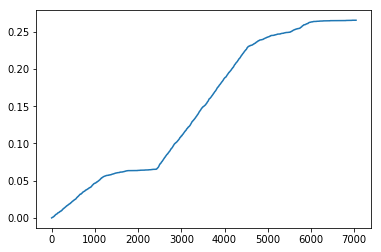

In [65]:
df.rate_churn.plot()

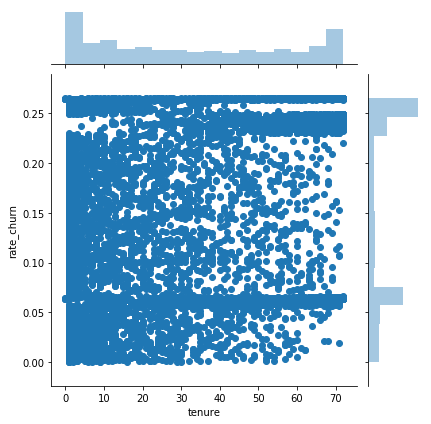

In [66]:
sns.jointplot(x=df.tenure, y=df.rate_churn, data=df)

## Question 2
Are there features that indicate a higher propensity to churn? like type of internet service, type of phone service, online security and backup, senior citizens, paying more than x% of customers with the same services, etc.? 

In [67]:
df[['internet_service_type_id','internet_service_type','internet_service_type_id.1']].head(10)

,internet_service_type_id,internet_service_type,internet_service_type_id.1
0,1,DSL,1
1,1,DSL,1
2,1,DSL,1
3,1,DSL,1
4,1,DSL,1
5,1,DSL,1
6,1,DSL,1
7,1,DSL,1
8,1,DSL,1
9,1,DSL,1


In [68]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'contract_type_id.1', 'contract_type',
       'internet_service_type_id.1', 'internet_service_type',
       'payment_type_id.1', 'payment_type', 'tenure_year', 'phone_id',
       'household_type_id', 'streaming_services', 'online_security_backup',
       'cumsum_churn', 'rate_churn'],
      dtype='object')

In [69]:
features = ['payment_type', 'tenure_year', 'internet_service_type', 'phone_id','household_type_id', 'streaming_services', 'online_security_backup','device_protection', 'tech_support','contract_type_id']

for element in features:
    print(pd.crosstab(train_df.churn, train_df[element], margins=True, normalize=True))

payment_type  Bank transfer (automatic)  Credit card (automatic)  \
churn                                                              
0                              0.186207                 0.182353   
1                              0.037728                 0.033469   
All                            0.223935                 0.215822   

payment_type  Electronic check  Mailed check       All  
churn                                                   
0                     0.180933      0.185193  0.734686  
1                     0.153955      0.040162  0.265314  
All                   0.334888      0.225355  1.000000  
tenure_year       0.0      0.08      0.17      0.25      0.33      0.42  \
churn                                                                     
0            0.001826  0.031440  0.015822  0.016227  0.012576  0.008925   
1            0.000000  0.053144  0.016836  0.012982  0.011968  0.008316   
All          0.001826  0.084584  0.032657  0.029209  0.024544  0.017241   

In [70]:
pd.crosstab(train_df.churn, train_df.internet_service_type, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')


internet_service_type,DSL,Fiber optic,None,All
churn,,,,
0,0.279513,0.254767,0.200406,0.734686
1,0.0659229,0.182759,0.0166329,0.265314
All,0.345436,0.437525,0.217039,1


In [71]:
pd.crosstab(train_df.churn, train_df.household_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')

household_type_id,0,1,2,3,All
churn,,,,,
0,0.308114,0.174848,0.041785,0.209939,0.734686
1,0.16146,0.056998,0.0107505,0.0361055,0.265314
All,0.469574,0.231846,0.0525355,0.246045,1


In [72]:
pd.crosstab(train_df.churn, train_df.phone_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')

phone_id,0,1,2,All
churn,,,,
0,0.0718053,0.365517,0.297363,0.734686
1,0.0249493,0.121907,0.118458,0.265314
All,0.0967546,0.487424,0.415822,1


In [73]:
pd.crosstab(train_df.churn, train_df.online_security_backup, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')

online_security_backup,0,2,3,4,5,All
churn,,,,,,
0,0.200406,0.162677,0.10568,0.124949,0.140974,0.734686
1,0.0166329,0.14929,0.0251521,0.0572008,0.0170385,0.265314
All,0.217039,0.311968,0.130832,0.18215,0.158012,1


In [74]:
pd.crosstab(train_df.churn, train_df.contract_type_id, margins=True, normalize=True).style.background_gradient(cmap='YlOrRd')

contract_type_id,1,2,3,All
churn,,,,
0,0.315619,0.189655,0.229412,0.734686
1,0.233469,0.0251521,0.00669371,0.265314
All,0.549087,0.214807,0.236105,1


## Based on these features: 
### 'payment_type', 'tenure_year', 'internet_service_type', 'phone_id','household_type_id', 'streaming_services', 'online_security_backup','device_protection', 'tech_support','contract_type_id'
### There is a difference between customers who have the following services:
### 'internet_service_type': Fiber optic and DSL customers are more likely to churn.
### 'household_type_id': Households without partners and without dependents are more likely to churn.
### 'phone_id': Anyone Phone services (1 line or multi-line) are more likely to churn.
### 'online_security_backup': Without online security & without online backup services are more likely to churn than with.
### 'contract_type_id': Month-to-month customers are most likely to churn

# Question 3
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point? If so, what is that point for what service(s)? 

In [ ]:
sns.swarmplot(x="online_security_backup", y="monthly_charges", data=train_df, hue="churn", palette="Set2")
ax = sns.boxplot(x="online_security_backup", y="monthly_charges", data=train_df,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

In [ ]:
sns.swarmplot(x="streaming_services", y="monthly_charges", data=train_df, hue="churn", palette="Set2")
ax = sns.boxplot(x="streaming_services", y="monthly_charges", data=train_df,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

In [ ]:
sns.swarmplot(x="phone_id", y="monthly_charges", data=train_df, hue="churn", palette="Set2")
ax = sns.boxplot(x="phone_id", y="monthly_charges", data=train_df,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

In [ ]:
sns.swarmplot(x="contract_type_id", y="monthly_charges", data=train_df, hue="churn", palette="Set2")
ax = sns.boxplot(x="contract_type_id", y="monthly_charges", data=train_df,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

### There does not seem to be a price threshold for monthly charges where customers are more likely to churn for any one service. 

# Question 4
If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable? 

In [102]:
mtm = train_df[train_df.contract_type_id == 1]
mtm_after12 = mtm[mtm.tenure_year > 1]

In [124]:
mtmc = mtm_after12.churn.value_counts()
mtmc

0    886
1    444
Name: churn, dtype: int64

In [139]:
print('Rate of churn for month-to-month after 12th month: {:.2%}'.format(mtmc[1]/(mtmc[0]+mtmc[1])))

Rate of churn for month-to-month after 12th month: 33.38%


In [105]:
one_year = train_df[train_df.contract_type_id == 2]
one_year_after12 = one_year[one_year.tenure_year > 1]

In [141]:
one_yearc = one_year_after12.churn.value_counts()
one_yearc

0    853
1    114
Name: churn, dtype: int64

In [149]:
print('Rate of churn for one_year after 12th month: {:.2%}'.format(one_yearc[1]/(one_yearc[0]+one_yearc[1])))

Rate of churn for one_year after 12th month: 11.79%


### The rate for month-to-month customers after the 12th month is 3x higher than the rate for 1-yr customers after the 12th month. 

# Question 5
Controlling for services (phone_id, internet_service_type_id, online_security_backup, device_protection, tech_support, and contract_type_id), is the mean monthly_charges of those who have churned significantly different from that of those who have not churned? (Use a t-test to answer this.) 


In [122]:
df[['monthly_charges','phone_id', 'internet_service_type_id', 'online_security_backup', 'device_protection', 'tech_support', 'contract_type_id']].head(10)

,monthly_charges,phone_id,internet_service_type_id,online_security_backup,device_protection,tech_support,contract_type_id
0,59.90,2,1,2,No,No,1
1,69.40,1,1,2,No,Yes,1
2,48.20,1,1,3,No,No,1
3,25.10,0,1,2,No,No,1
4,30.50,0,1,3,No,No,1
5,49.25,1,1,3,No,No,1
6,45.00,0,1,5,Yes,Yes,1
7,44.30,1,1,2,No,No,1
8,50.35,2,1,2,No,No,1
9,64.50,2,1,3,No,No,1


In [123]:
features = ['phone_id', 'internet_service_type_id', 'online_security_backup', 'device_protection', 'tech_support', 'contract_type_id']

In [124]:
features

['phone_id',
 'internet_service_type_id',
 'online_security_backup',
 'device_protection',
 'tech_support',
 'contract_type_id']

In [ ]:
# for element in features:
#     uni_elements = (df[element].unique())
#     for i in uni_elements:
#         element = features[element]
#         print(stats.ttest_ind(df['monthly_charges'], df.element==i))
    
#     for i in df[features[i]].unique:
#         print(stats.ttest_ind(df['monthly_charges'], df[features[i]]))

## For phone_id, the t-test shows that there is a large difference between the mean of the monthly charges for those who have NO PHONE SERVICE.

In [125]:
stats.ttest_ind(train_df['monthly_charges'],train_df.phone_id==0)

Ttest_indResult(statistic=60.918154437714556, pvalue=0.0)

In [126]:
stats.ttest_ind(train_df['monthly_charges'],train_df.phone_id==1)

Ttest_indResult(statistic=-3.0749700626430325, pvalue=0.0021109962525832538)

In [127]:
stats.ttest_ind(train_df['monthly_charges'],train_df.phone_id==2)

Ttest_indResult(statistic=5.6095624908392026, pvalue=2.0831315196171296e-08)

## For internet_service_type_id, the t-test shows that the BIGGEST difference between the mean monthly charges is for the customers WITH NO INTERNET SERVICE.

## The second largest difference between the monthly charges is with the DSL customers.

## The smallest difference between monthly charges is with Fiber Optic customers.

In [128]:
df['internet_service_type_id'].unique()

array([1, 2, 3])

In [129]:
stats.ttest_ind(train_df['monthly_charges'],train_df.internet_service_type_id==1)

Ttest_indResult(statistic=14.550105059179268, pvalue=1.807360643707193e-47)

In [130]:
stats.ttest_ind(train_df['monthly_charges'],train_df.internet_service_type_id==2)

Ttest_indResult(statistic=2.953386115636789, pvalue=0.0031505053514344914)

In [131]:
stats.ttest_ind(train_df['monthly_charges'],train_df.internet_service_type_id==3)

Ttest_indResult(statistic=33.738350176973384, pvalue=3.036993616422523e-236)

## For online_security_backup, the t-test shows that the BIGGEST difference between the mean monthly charges is for the customers WITH EITHER OR BOTH SERVICES (Online security and online backup.

In [132]:
df['online_security_backup'].unique()

array([2, 3, 5, 4, 0])

In [133]:
stats.ttest_ind(train_df['monthly_charges'],train_df.online_security_backup==0)

Ttest_indResult(statistic=33.738350176973384, pvalue=3.036993616422523e-236)

In [134]:
stats.ttest_ind(train_df['monthly_charges'],train_df.online_security_backup==2)

Ttest_indResult(statistic=19.080917531429225, pvalue=9.855956737160408e-80)

In [135]:
stats.ttest_ind(train_df['monthly_charges'],train_df.online_security_backup==3)

Ttest_indResult(statistic=51.53574095282298, pvalue=0.0)

In [136]:
stats.ttest_ind(train_df['monthly_charges'],train_df.online_security_backup==4)

Ttest_indResult(statistic=40.20243574124135, pvalue=0.0)

In [137]:
stats.ttest_ind(train_df['monthly_charges'],train_df.online_security_backup==5)

Ttest_indResult(statistic=45.20560987263717, pvalue=0.0)

## For device_protection, the t-test shows that the BIGGEST difference between the mean monthly charges is for the customers WITH NO INTERNET SERVICE.

In [138]:
df['device_protection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [139]:
stats.ttest_ind(train_df['monthly_charges'],train_df.device_protection=='No')

Ttest_indResult(statistic=2.4847346542459636, pvalue=0.012981268975733503)

In [140]:
stats.ttest_ind(train_df['monthly_charges'],train_df.device_protection=='Yes')

Ttest_indResult(statistic=15.060367698325406, pvalue=1.078987151538876e-50)

In [141]:
stats.ttest_ind(train_df['monthly_charges'],train_df.device_protection=='No internet service')

Ttest_indResult(statistic=33.738350176973384, pvalue=3.036993616422523e-236)

## For tech_support, the t-test shows that the BIGGEST differences between the mean monthly charges are for the customers WITH TECH SUPPORT OR NO INTERNET SERVICE.

In [142]:
df['tech_support'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [143]:
stats.ttest_ind(train_df['monthly_charges'],train_df.tech_support=='No')

Ttest_indResult(statistic=-4.051710216310085, pvalue=5.1234656562537754e-05)

In [144]:
stats.ttest_ind(train_df['monthly_charges'],train_df.tech_support=='Yes')

Ttest_indResult(statistic=22.571980801589756, pvalue=4.867740062299326e-110)

In [145]:
stats.ttest_ind(train_df['monthly_charges'],train_df.tech_support=='No internet service')

Ttest_indResult(statistic=33.738350176973384, pvalue=3.036993616422523e-236)

## For contract_type_id, the t-test shows that the BIGGEST differences between the mean monthly charges are for the customers WITH 2 year OR 3 year SERVICE.

In [146]:
df['contract_type_id'].unique()

array([1, 2, 3])

In [147]:
stats.ttest_ind(train_df['monthly_charges'],train_df.contract_type_id==1)

Ttest_indResult(statistic=-10.539463289394869, pvalue=7.795174905139504e-26)

In [148]:
stats.ttest_ind(train_df['monthly_charges'],train_df.contract_type_id==2)

Ttest_indResult(statistic=34.12920104225471, pvalue=2.091105285157649e-241)

In [149]:
stats.ttest_ind(train_df['monthly_charges'],train_df.contract_type_id==3)

Ttest_indResult(statistic=30.50472267105949, pvalue=2.2340463668662617e-195)

# Question 6 
How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

In [ ]:
sp.stats.pearsonr(train_df.monthly_charges, train_df.internet_service_type_id)